## Carga de dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = 'train.csv'
df = pd.read_csv(filename)

## Vista rápida de los datos

In [60]:
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,rend_num
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,3
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,2


In [61]:
print("Shape", df.shape)

Shape (692500, 22)


In [62]:
print("Columnas:", list(df.columns))
print("\nTipos de datos:\n", df.dtypes)

Columnas: ['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4', 'rend_num']

Tipos de datos:
 ID                                   int64
PERIODO                              int64
ESTU_PRGM_ACADEMICO                 object
ESTU_PRGM_DEPARTAMENTO              object
ESTU_VALORMATRICULAUNIVERSIDAD      object
ESTU_HORASSEMANATRABAJA             object
FAMI_ESTRATOVIVIENDA              category
FAMI_TIENEINTERNET                  object
FAMI_EDUCACIONPADRE                 object
FAMI_TIENELAVADORA                  object
FAMI_TIENEAUTOMOVIL                 object
ESTU_PRIVADO_LIBERTAD               object
ESTU_PAGOMATRICU

## Rendimiento global

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


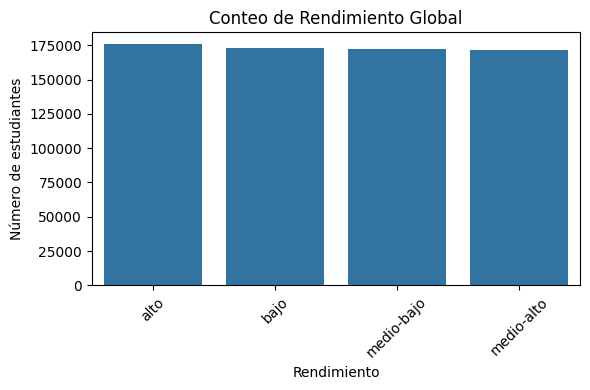

In [63]:
counts = df['RENDIMIENTO_GLOBAL'].value_counts()
print(counts)

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.title("Conteo de Rendimiento Global")
plt.ylabel("Número de estudiantes")
plt.xlabel("Rendimiento")
plt.tight_layout()
plt.show()

## Número de estudiantes por departamento


ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
Name: count, dtype: int64


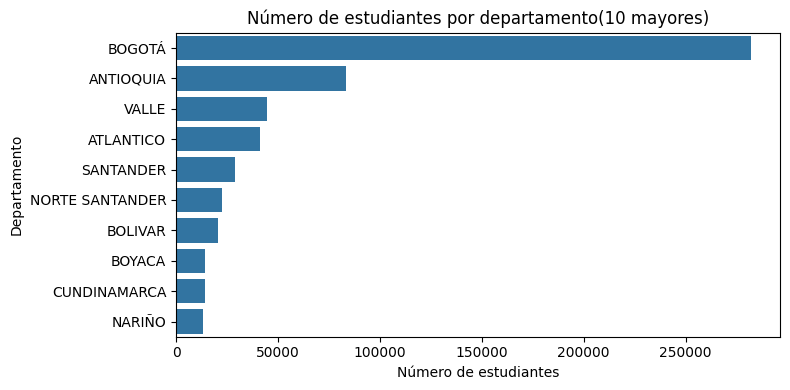

In [64]:
top_deptos = (df['ESTU_PRGM_DEPARTAMENTO']
               .value_counts()
               .nlargest(10))

print(top_deptos)

plt.figure(figsize=(8,4))
sns.barplot(x=top_deptos.values, y=top_deptos.index)
plt.title("Número de estudiantes por departamento(10 mayores)")
plt.xlabel("Número de estudiantes")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()

## Estrato de los estudiantes


FAMI_ESTRATOVIVIENDA
Estrato 1      111991
Estrato 2      232671
Estrato 3      210685
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


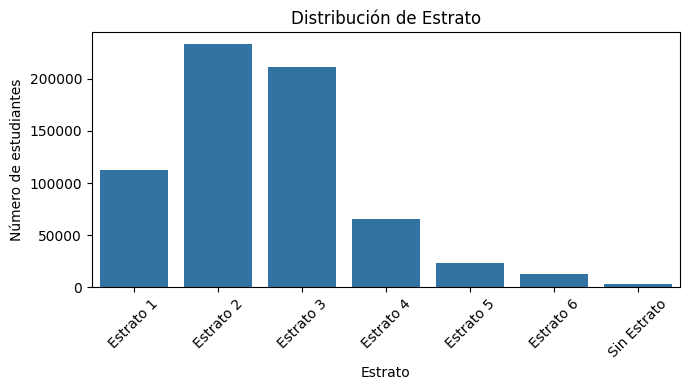

In [65]:
estratos = ['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6','Sin Estrato']
df['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df['FAMI_ESTRATOVIVIENDA'],
                                           categories=estratos,
                                           ordered=True)

freq_estrato = df['FAMI_ESTRATOVIVIENDA'].value_counts().reindex(estratos)
print(freq_estrato)

plt.figure(figsize=(7,4))
sns.barplot(x=freq_estrato.index, y=freq_estrato.values)
plt.xticks(rotation=45)
plt.title("Distribución de Estrato")
plt.ylabel("Número de estudiantes")
plt.xlabel("Estrato")
plt.tight_layout()
plt.show()

## Información y descripción numérica


In [66]:
df.info()

# Estadísticas
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   ID                              692500 non-null  int64   
 1   PERIODO                         692500 non-null  int64   
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object  
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object  
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object  
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object  
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  category
 7   FAMI_TIENEINTERNET              665871 non-null  object  
 8   FAMI_EDUCACIONPADRE             669322 non-null  object  
 9   FAMI_TIENELAVADORA              652727 non-null  object  
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object  
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object  
 12  ES

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.750,494564.500,741782.500,989286.000
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332
rend_num,692500.0,2.505227,1.121061,1.0,2.000,3.000,4.000,4.000


## Número de estudiantes por programa académico


           Programa Académico  Número de Estudiantes
0                     DERECHO                  53244
1  ADMINISTRACION DE EMPRESAS                  51902
2          CONTADURIA PUBLICA                  39664
3                  PSICOLOGIA                  31932
4       INGENIERIA INDUSTRIAL                  28481
5  ADMINISTRACIÓN DE EMPRESAS                  24777
6            INGENIERIA CIVIL                  19487
7                    MEDICINA                  18099
8                  PSICOLOGÍA                  17377
9      INGENIERIA DE SISTEMAS                  17150


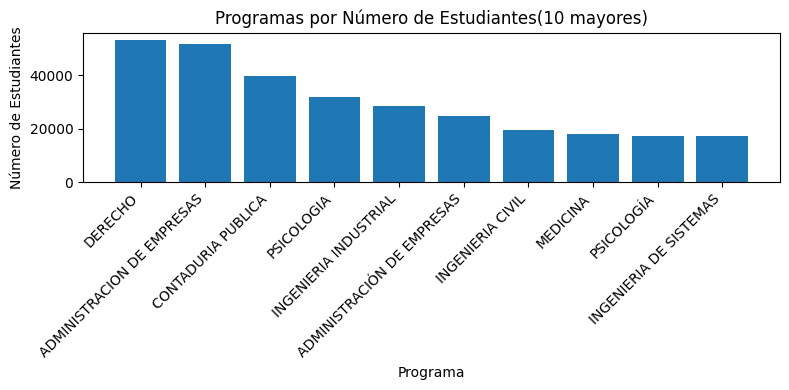

In [67]:
count_prog = df['ESTU_PRGM_ACADEMICO'].value_counts().reset_index()
count_prog.columns = ['Programa Académico', 'Número de Estudiantes']

top10_count = count_prog.head(10)
print(top10_count)

plt.figure(figsize=(8,4))
plt.bar(top10_count['Programa Académico'], top10_count['Número de Estudiantes'])
plt.xticks(rotation=45, ha='right')
plt.title("Programas por Número de Estudiantes(10 mayores)")
plt.xlabel("Programa")
plt.ylabel("Número de Estudiantes")
plt.tight_layout()
plt.show()

## Rendimiento promedio por programa académico


                                    Programa Académico  Promedio Rendimiento
889              PROFESIONAL EN INVESTIGACIÓN CRIMINAL                   4.0
716            LICENCIATURA EN FILOSOF¿A Y HUMANIDADES                   4.0
667  LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y ...                   4.0
774              LICENCIATURA EN PEDAGOGIA REEDUCATIVA                   4.0
552    LICENCIATURA EN  LITERATURA Y LENGUA CASTELLANA                   4.0
542                         LENGUAS MODERNAS Y CULTURA                   4.0
543                                  LENGUAS Y CULTURA                   4.0
702                LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                   4.0
719                             LICENCIATURA EN FÍSICA                   4.0
545               LICENCIATURA  EN  CIENCIAS  SOCIALES                   4.0


<ipython-input-72-822e407141e6>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


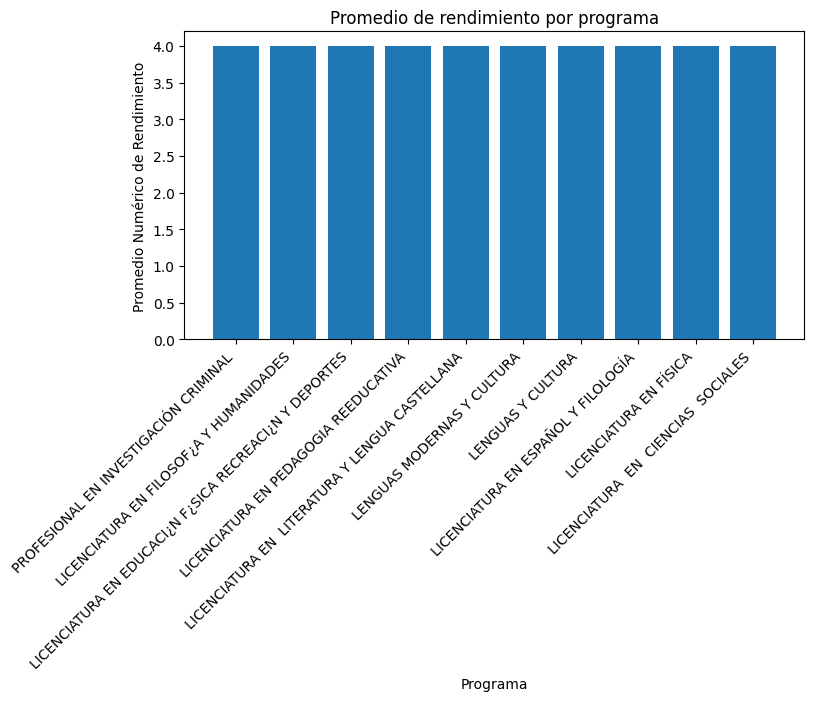

In [72]:
mean_prog = df.groupby('ESTU_PRGM_ACADEMICO')['rend_num'].mean().reset_index()
mean_prog.columns = ['Programa Académico', 'Promedio Rendimiento']
top10_mean = mean_prog.sort_values('Promedio Rendimiento', ascending=False).head(10)

print(top10_mean)

plt.figure(figsize=(8,4))
plt.bar(top10_mean['Programa Académico'], top10_mean['Promedio Rendimiento'])
plt.xticks(rotation=45, ha='right')
plt.title("Promedio de rendimiento por programa")
plt.xlabel("Programa")
plt.ylabel("Promedio Numérico de Rendimiento")
plt.tight_layout()
plt.show()

## Departamentos con promedio de rendimiento más alto


   Departamento Académico  Promedio Rendimiento
14           CUNDINAMARCA              2.930732
7                  CALDAS              2.764519
26              SANTANDER              2.734286
6                  BOYACA              2.686361
1               ANTIOQUIA              2.667600
29                  VALLE              2.590944
24              RISARALDA              2.568105
4                  BOGOTÁ              2.557381
23                QUINDIO              2.477336
3               ATLANTICO              2.454778


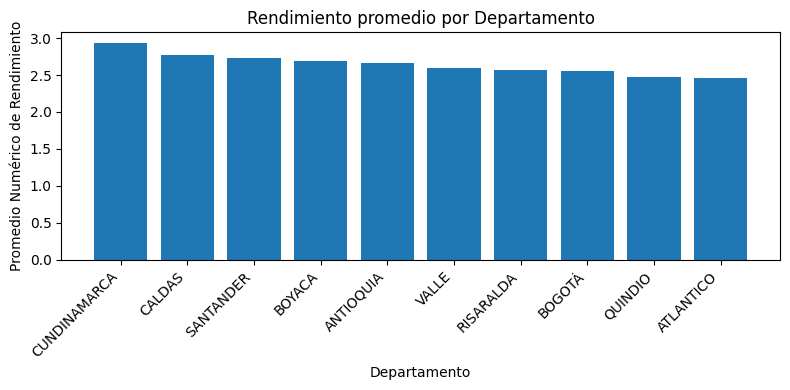

In [73]:
mean_depto = df.groupby('ESTU_PRGM_DEPARTAMENTO')['rend_num'].mean().reset_index()
mean_depto.columns = ['Departamento Académico', 'Promedio Rendimiento']
top10_depto = mean_depto.sort_values('Promedio Rendimiento', ascending=False).head(10)

print(top10_depto)

plt.figure(figsize=(8,4))
plt.bar(top10_depto['Departamento Académico'], top10_depto['Promedio Rendimiento'])
plt.xticks(rotation=45, ha='right')
plt.title("Rendimiento promedio por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Promedio Numérico de Rendimiento")
plt.tight_layout()
plt.show()